# Wine dataset classification

In [1]:
import configparser
import numpy as np
import pandas as pd
import logging
import coloredlogs

import aux_functions as aux
from decisiontree import Node


In [2]:
N_SPLITS = 10  # number of cross-validation splits (folds)

In [3]:
# read the configuration file
config = configparser.ConfigParser()
config.read("config.ini")

# configure logger
logger = logging.getLogger(__name__)
coloredlogs.install(level='WARNING', logger=logger.parent)

In [4]:
%matplotlib inline

## Load the dataset
a) load data headers

In [5]:
data_headers_fname = config['Data']['data_headers']
data_headers_fname


'./wine_data_headers.txt'

In [6]:
# strip 3 initial characters (row number + closing bracket + optional whitespace)
headers = np.loadtxt(data_headers_fname, dtype=str, delimiter='\n', converters={0: lambda attr: attr[3:]})
headers


array(['Class ID', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'], dtype='<U28')

b) load the data

In [7]:
data_fname = config['Data']['data_file']
data_fname

'./wine_data.txt'

In [8]:
df_input = pd.read_csv(data_fname, names=headers)
df_input.head()

,Class ID,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Decision tree classification
### Define exemplary decision tree


In [9]:
tree = Node(df_input, target_column=int(config['Data']['target_column']))
tree.learn(max_depth=5)

In [10]:
tree.depth

5

In [11]:
tree.print_terminal_labels()

Level 2 node, [0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [0, 1, 0]: class 3 ([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Level 4 node, [0, 1, 1, 0]: class 2 ([2])
Level 5 node, [0, 1, 1, 1, 0]: class 2 ([2])
Level 5 node, [0, 1, 1, 1, 1]: class 3 ([3, 3, 3, 3, 3, 3, 2, 3])
Level 3 node, [1, 0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 4 node, [1, 0, 1, 0]: class 1 ([1])
Level 4 node, [1, 0, 1, 1]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2])
Level 4 node, [1, 1, 0, 0]: class 1 ([1])
Level 5 node, [1, 1, 0, 1, 0]: class 2 ([2])
Level 5 node, [1, 1, 0, 1, 1]: class 2 ([1, 2, 2, 2, 2, 1, 1, 1, 2])
Level 3 node, [1, 1, 1]: class 1 ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [12]:
tree.prune(min_points=2)

In [13]:
tree.depth

3

In [14]:
tree.print_terminal_labels()

Level 2 node, [0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [0, 1, 0]: class 3 ([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Level 3 node, [0, 1, 1]: class 3 ([3, 3, 2, 3, 3, 3, 3, 2, 2, 3])
Level 3 node, [1, 0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [1, 0, 1]: class 2 ([2, 1, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [1, 1, 0]: class 2 ([1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2])
Level 3 node, [1, 1, 1]: class 1 ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Parameter tuning
Tune parameters: maximal tree depth and minimal number of samples required per leaf. Use 10-fold cross-validation.

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:04,  4.97s/it]
2it [00:08,  4.67s/it]
3it [00:12,  4.39s/it]
4it [00:16,  4.19s/it]
5it [00:20,  4.02s/it]
6it [00:23,  3.89s/it]
7it [00:27,  3.81s/it]
8it [00:30,  3.74s/it]
9it [00:34,  3.69s/it]
10it [00:37,  3.80s/it]


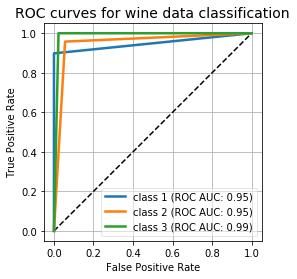

1it [00:38, 38.16s/it]
0it [00:00, ?it/s]
1it [00:03,  3.69s/it]
2it [00:07,  3.75s/it]
3it [00:11,  3.71s/it]
4it [00:15,  3.78s/it]
5it [00:19,  3.83s/it]
6it [00:24,  4.18s/it]
7it [00:29,  4.46s/it]
8it [00:33,  4.31s/it]
9it [00:37,  4.22s/it]
10it [00:41,  4.15s/it]


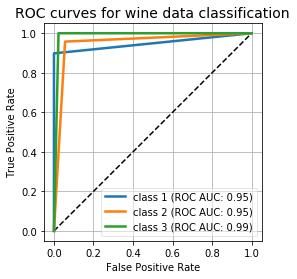

2it [01:19, 39.24s/it]
0it [00:00, ?it/s]
1it [00:04,  4.01s/it]
2it [00:08,  4.04s/it]
3it [00:11,  3.93s/it]
4it [00:15,  3.86s/it]
5it [00:19,  3.81s/it]
6it [00:22,  3.79s/it]
7it [00:26,  3.77s/it]
8it [00:30,  3.73s/it]
9it [00:33,  3.71s/it]
10it [00:37,  3.76s/it]


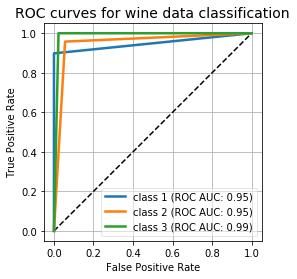

3it [01:57, 38.79s/it]
0it [00:00, ?it/s]
1it [00:03,  3.65s/it]
2it [00:07,  3.64s/it]
3it [00:10,  3.64s/it]
4it [00:14,  3.65s/it]
5it [00:18,  3.65s/it]
6it [00:21,  3.68s/it]
7it [00:25,  3.69s/it]
8it [00:29,  3.67s/it]
9it [00:33,  3.68s/it]
10it [00:37,  3.70s/it]


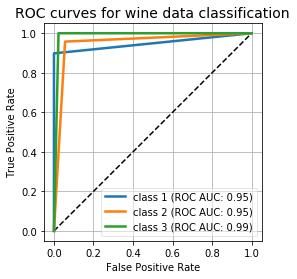

4it [02:34, 38.30s/it]
0it [00:00, ?it/s]
1it [00:04,  4.10s/it]
2it [00:08,  4.20s/it]
3it [00:13,  4.29s/it]
4it [00:17,  4.29s/it]
5it [00:21,  4.21s/it]
6it [00:25,  4.14s/it]
7it [00:29,  4.09s/it]
8it [00:33,  4.02s/it]
9it [00:37,  3.98s/it]
10it [00:41,  4.11s/it]


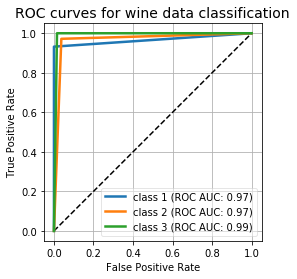

5it [03:16, 39.17s/it]
0it [00:00, ?it/s]
1it [00:03,  3.91s/it]
2it [00:07,  3.92s/it]
3it [00:11,  3.92s/it]
4it [00:16,  4.20s/it]
5it [00:21,  4.27s/it]
6it [00:25,  4.27s/it]
7it [00:29,  4.19s/it]
8it [00:33,  4.25s/it]
9it [00:39,  4.59s/it]
10it [00:43,  4.36s/it]


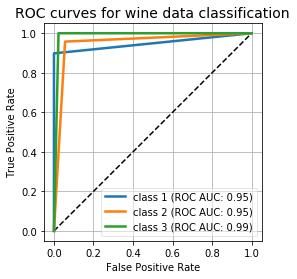

6it [03:59, 40.57s/it]
0it [00:00, ?it/s]
1it [00:04,  4.93s/it]
2it [00:09,  4.72s/it]
3it [00:13,  4.62s/it]
4it [00:18,  4.63s/it]
5it [00:22,  4.51s/it]
6it [00:26,  4.34s/it]
7it [00:30,  4.29s/it]
8it [00:34,  4.32s/it]
9it [00:40,  4.71s/it]
10it [00:45,  4.51s/it]


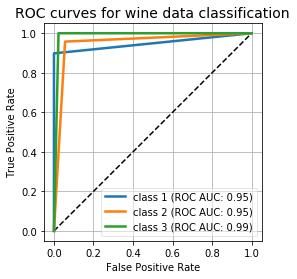

7it [04:45, 41.97s/it]
0it [00:00, ?it/s]
1it [00:03,  3.97s/it]
2it [00:07,  3.98s/it]
3it [00:11,  3.96s/it]
4it [00:15,  3.97s/it]
5it [00:19,  3.96s/it]
6it [00:23,  3.98s/it]
7it [00:27,  3.96s/it]
8it [00:31,  3.94s/it]
9it [00:35,  3.95s/it]
10it [00:39,  3.96s/it]


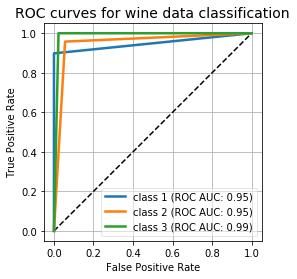

8it [05:24, 41.32s/it]
0it [00:00, ?it/s]
1it [00:04,  4.06s/it]
2it [00:08,  4.07s/it]
3it [00:12,  4.06s/it]
4it [00:16,  4.06s/it]
5it [00:20,  4.05s/it]
6it [00:24,  4.07s/it]
7it [00:28,  4.10s/it]
8it [00:32,  4.09s/it]
9it [00:36,  4.11s/it]
10it [00:40,  4.09s/it]


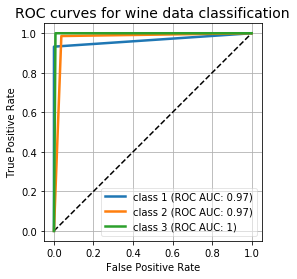

9it [06:05, 41.23s/it]
0it [00:00, ?it/s]
1it [00:04,  4.08s/it]
2it [00:08,  4.07s/it]
3it [00:12,  4.08s/it]
4it [00:16,  4.10s/it]
5it [00:20,  4.08s/it]
6it [00:24,  4.13s/it]
7it [00:28,  4.10s/it]
8it [00:32,  4.10s/it]
9it [00:36,  4.09s/it]
10it [00:40,  4.09s/it]


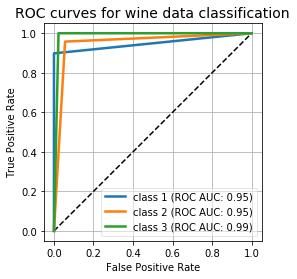

10it [06:46, 41.18s/it]
0it [00:00, ?it/s]
1it [00:04,  4.08s/it]
2it [00:08,  4.08s/it]
3it [00:12,  4.07s/it]
4it [00:16,  4.06s/it]
5it [00:20,  4.10s/it]
6it [00:24,  4.09s/it]
7it [00:29,  4.36s/it]
8it [00:34,  4.49s/it]
9it [00:38,  4.46s/it]
10it [00:42,  4.29s/it]


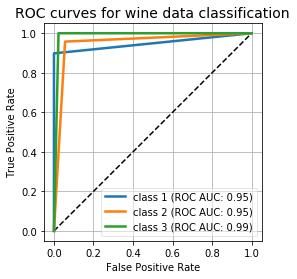

11it [07:30, 41.73s/it]
0it [00:00, ?it/s]
1it [00:04,  4.05s/it]
2it [00:08,  4.08s/it]
3it [00:12,  4.23s/it]
4it [00:17,  4.26s/it]
5it [00:21,  4.31s/it]
6it [00:26,  4.41s/it]
7it [00:30,  4.51s/it]
8it [00:35,  4.41s/it]
9it [00:39,  4.31s/it]
10it [00:43,  4.36s/it]


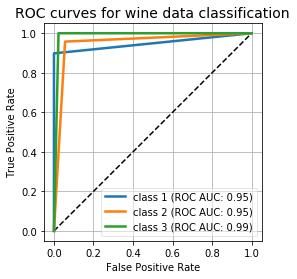

12it [08:13, 42.34s/it]
0it [00:00, ?it/s]
1it [00:05,  5.18s/it]
2it [00:11,  5.45s/it]
3it [00:15,  5.17s/it]
4it [00:20,  4.91s/it]
5it [00:24,  4.85s/it]
6it [00:29,  4.72s/it]
7it [00:35,  5.31s/it]
8it [00:40,  5.05s/it]
9it [00:45,  4.96s/it]
10it [00:49,  4.99s/it]


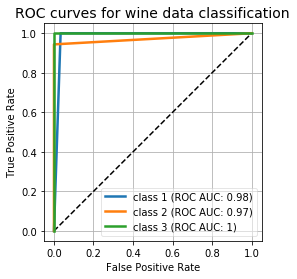

13it [09:03, 44.66s/it]
0it [00:00, ?it/s]
1it [00:04,  4.34s/it]
2it [00:09,  4.52s/it]
3it [00:13,  4.53s/it]
4it [00:18,  4.56s/it]
5it [00:23,  4.60s/it]
6it [00:27,  4.62s/it]
7it [00:33,  4.79s/it]
8it [00:39,  5.16s/it]
9it [00:44,  5.28s/it]
10it [00:49,  4.97s/it]


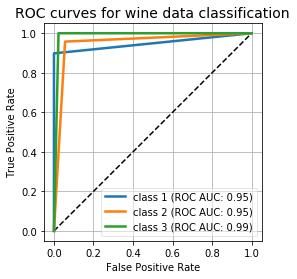

14it [09:53, 46.27s/it]
0it [00:00, ?it/s]
1it [00:04,  4.88s/it]
2it [00:09,  4.89s/it]
3it [00:14,  4.71s/it]
4it [00:18,  4.67s/it]
5it [00:23,  4.62s/it]
6it [00:27,  4.51s/it]
7it [00:31,  4.45s/it]
8it [00:35,  4.37s/it]
9it [00:40,  4.31s/it]
10it [00:44,  4.46s/it]


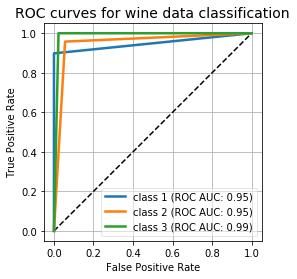

15it [10:38, 45.80s/it]
0it [00:00, ?it/s]
1it [00:05,  5.44s/it]
2it [00:09,  5.07s/it]
3it [00:13,  4.80s/it]
4it [00:18,  4.62s/it]
5it [00:22,  4.50s/it]
6it [00:26,  4.43s/it]
7it [00:30,  4.34s/it]
8it [00:34,  4.31s/it]
9it [00:39,  4.28s/it]
10it [00:43,  4.33s/it]


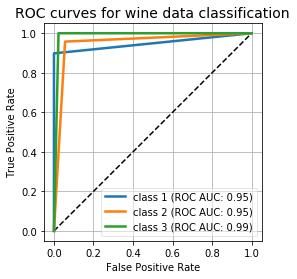

16it [11:21, 45.08s/it]
0it [00:00, ?it/s]
1it [00:04,  4.24s/it]
2it [00:08,  4.24s/it]
3it [00:12,  4.23s/it]
4it [00:16,  4.22s/it]
5it [00:21,  4.22s/it]
6it [00:25,  4.24s/it]
7it [00:29,  4.23s/it]
8it [00:33,  4.24s/it]
9it [00:38,  4.25s/it]
10it [00:42,  4.23s/it]


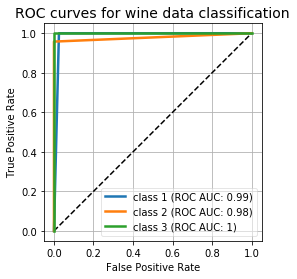

17it [12:04, 44.30s/it]
0it [00:00, ?it/s]
1it [00:04,  4.60s/it]
2it [00:09,  4.62s/it]
3it [00:13,  4.63s/it]
4it [00:18,  4.52s/it]
5it [00:22,  4.55s/it]
6it [00:27,  4.47s/it]
7it [00:34,  5.24s/it]
8it [00:39,  5.42s/it]
9it [00:44,  5.18s/it]
10it [00:49,  4.91s/it]


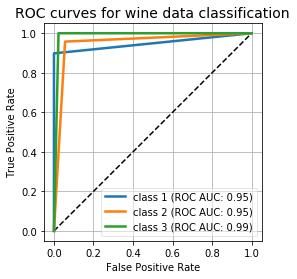

18it [12:53, 45.78s/it]
0it [00:00, ?it/s]
1it [00:04,  4.91s/it]
2it [00:10,  5.22s/it]
3it [00:15,  5.09s/it]
4it [00:21,  5.21s/it]
5it [00:25,  5.08s/it]
6it [00:30,  4.91s/it]
7it [00:34,  4.71s/it]
8it [00:38,  4.58s/it]
9it [00:43,  4.49s/it]
10it [00:47,  4.75s/it]


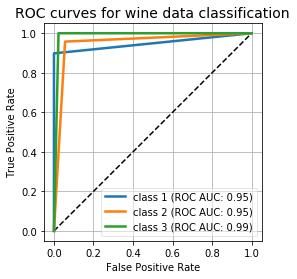

19it [13:41, 46.33s/it]
0it [00:00, ?it/s]
1it [00:04,  4.32s/it]
2it [00:08,  4.31s/it]
3it [00:15,  5.17s/it]
4it [00:22,  5.55s/it]
5it [00:26,  5.15s/it]
6it [00:30,  4.87s/it]
7it [00:34,  4.67s/it]
8it [00:39,  4.53s/it]
9it [00:43,  4.44s/it]
10it [00:47,  4.76s/it]


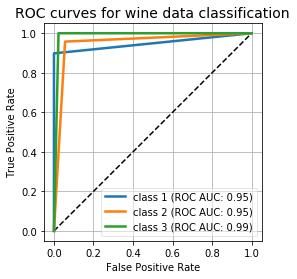

20it [14:29, 46.75s/it]
0it [00:00, ?it/s]
1it [00:04,  4.32s/it]
2it [00:08,  4.32s/it]
3it [00:12,  4.31s/it]
4it [00:17,  4.31s/it]
5it [00:21,  4.30s/it]
6it [00:25,  4.31s/it]
7it [00:30,  4.31s/it]
8it [00:34,  4.43s/it]
9it [00:40,  4.67s/it]
10it [00:44,  4.50s/it]


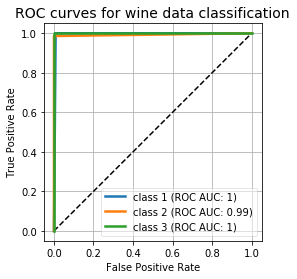

21it [15:14, 46.25s/it]
0it [00:00, ?it/s]
1it [00:04,  4.75s/it]
2it [00:09,  4.77s/it]
3it [00:14,  4.70s/it]
4it [00:18,  4.63s/it]
5it [00:22,  4.56s/it]
6it [00:27,  4.58s/it]
7it [00:33,  4.84s/it]
8it [00:37,  4.80s/it]
9it [00:42,  4.70s/it]
10it [00:46,  4.65s/it]


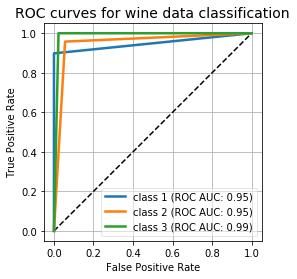

22it [16:00, 46.38s/it]
0it [00:00, ?it/s]
1it [00:04,  4.86s/it]
2it [00:09,  4.71s/it]
3it [00:13,  4.59s/it]
4it [00:17,  4.52s/it]
5it [00:22,  4.59s/it]
6it [00:28,  4.82s/it]
7it [00:32,  4.78s/it]
8it [00:38,  5.07s/it]
9it [00:44,  5.23s/it]
10it [00:48,  4.85s/it]


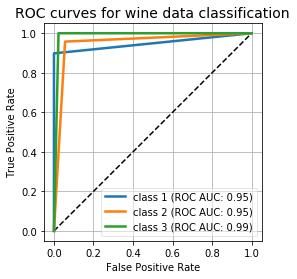

23it [16:49, 47.07s/it]
0it [00:00, ?it/s]
1it [00:04,  4.75s/it]
2it [00:09,  4.65s/it]
3it [00:14,  4.73s/it]
4it [00:18,  4.70s/it]
5it [00:23,  4.60s/it]
6it [00:27,  4.52s/it]
7it [00:31,  4.47s/it]
8it [00:36,  4.48s/it]
9it [00:41,  4.60s/it]
10it [00:45,  4.56s/it]


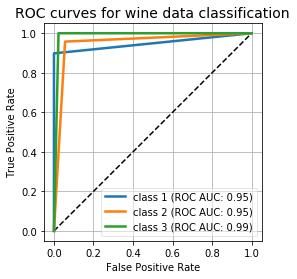

24it [17:35, 46.69s/it]
0it [00:00, ?it/s]
1it [00:04,  4.40s/it]
2it [00:10,  4.80s/it]
3it [00:16,  5.36s/it]
4it [00:21,  5.12s/it]
5it [00:25,  4.93s/it]
6it [00:30,  4.77s/it]
7it [00:34,  4.66s/it]
8it [00:39,  4.57s/it]
9it [00:43,  4.55s/it]
10it [00:47,  4.79s/it]


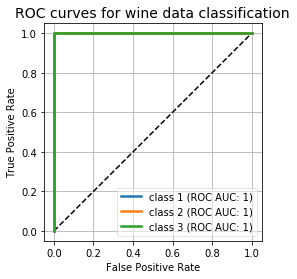

25it [18:23, 47.10s/it]
0it [00:00, ?it/s]
1it [00:04,  4.45s/it]
2it [00:08,  4.43s/it]
3it [00:13,  4.43s/it]
4it [00:17,  4.45s/it]
5it [00:22,  4.43s/it]
6it [00:27,  4.64s/it]
7it [00:32,  4.76s/it]
8it [00:36,  4.73s/it]
9it [00:42,  4.86s/it]
10it [00:47,  4.79s/it]


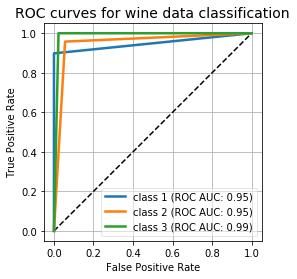

26it [19:11, 47.39s/it]
0it [00:00, ?it/s]
1it [00:05,  5.43s/it]
2it [00:09,  5.13s/it]
3it [00:14,  4.91s/it]
4it [00:20,  5.19s/it]
5it [00:26,  5.50s/it]
6it [00:32,  5.76s/it]
7it [00:37,  5.37s/it]
8it [00:44,  5.87s/it]
9it [00:49,  5.74s/it]
10it [00:56,  5.62s/it]


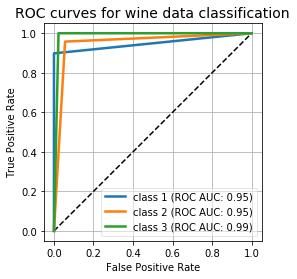

27it [20:07, 50.09s/it]
0it [00:00, ?it/s]
1it [00:05,  5.07s/it]
2it [00:10,  5.03s/it]
3it [00:14,  4.84s/it]
4it [00:18,  4.72s/it]
5it [00:23,  4.62s/it]
6it [00:27,  4.55s/it]
7it [00:32,  4.50s/it]
8it [00:36,  4.59s/it]
9it [00:41,  4.56s/it]
10it [00:45,  4.60s/it]


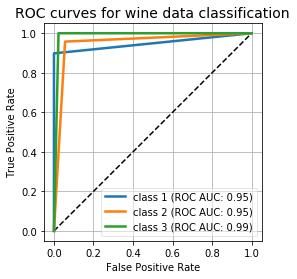

28it [20:53, 44.78s/it]


In [15]:
tree_params = dict(max_depth=range(3, 10), min_points=range(1, 5))
all_results, best_result = aux.tune_params(aux.cross_validate_tree, tree_params, func_args=(N_SPLITS, df_input),
                                           scoring_metrics='f1_score')

In [16]:
all_results

[{'max_depth': 3, 'min_points': 1, 'cm': array([[53,  6,  0],
         [ 0, 68,  3],
         [ 0,  0, 48]], dtype=int64), 'accuracy': 0.949438202247191, 'f1_score': 0.949438202247191},
 {'max_depth': 3, 'min_points': 2, 'cm': array([[53,  6,  0],
         [ 0, 68,  3],
         [ 0,  0, 48]], dtype=int64), 'accuracy': 0.949438202247191, 'f1_score': 0.949438202247191},
 {'max_depth': 3, 'min_points': 3, 'cm': array([[53,  6,  0],
         [ 0, 68,  3],
         [ 0,  0, 48]], dtype=int64), 'accuracy': 0.949438202247191, 'f1_score': 0.949438202247191},
 {'max_depth': 3, 'min_points': 4, 'cm': array([[53,  6,  0],
         [ 0, 68,  3],
         [ 0,  0, 48]], dtype=int64), 'accuracy': 0.949438202247191, 'f1_score': 0.949438202247191},
 {'max_depth': 4, 'min_points': 1, 'cm': array([[55,  4,  0],
         [ 0, 69,  2],
         [ 0,  0, 48]], dtype=int64), 'accuracy': 0.9662921348314607, 'f1_score': 0.9662921348314607},
 {'max_depth': 4, 'min_points': 2, 'cm': array([[53,  6,  0],
      

In [17]:
best_result

{'max_depth': 9, 'min_points': 1, 'cm': array([[59,  0,  0],
        [ 0, 71,  0],
        [ 0,  0, 48]], dtype=int64), 'accuracy': 1.0, 'f1_score': 1.0}

## Other classification models

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


Split the dataset into X (input attributes) and y (labels)

In [19]:
df_y = tree.class_labels
df_x = tree.data[tree.input_attributes]
df_x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Define generic grid search

In [20]:
gs = aux.make_grid_searcher(df_x, df_y, N_SPLITS)

### Random Forest Classifier

c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


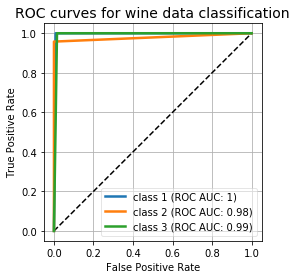

In [21]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_params = dict(max_depth=range(3,10), min_samples_leaf=range(1,5))
rf_best_params, rf_stats = gs(rf, rf_params)


In [22]:
rf_best_params

{'max_depth': 5, 'min_samples_leaf': 1}

In [23]:
rf_stats

{'cm': array([[59,  0,  0],
        [ 1, 68,  2],
        [ 0,  0, 48]], dtype=int64),
 'accuracy': 0.9831460674157303,
 'f1_score': 0.9831460674157303}

## Shallow Neural Network
With single hidden layer

c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_networ

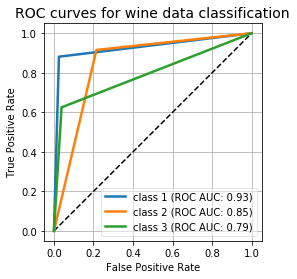

({'alpha': 0.001, 'hidden_layer_sizes': (500,)}, {'cm': array([[52,  7,  0],
         [ 1, 65,  5],
         [ 2, 16, 30]], dtype=int64),
  'accuracy': 0.8258426966292135,
  'f1_score': 0.8258426966292135})

In [24]:
snn = MLPClassifier()
snn_params = dict(hidden_layer_sizes=[(100,), (200,), (500,), (1000,)], alpha=[0.001, 0.0001, 0.00001])
gs(snn, snn_params)

### Deep Neural Network

c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

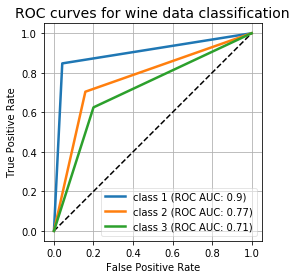

({'alpha': 0.001,
  'hidden_layer_sizes': (50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50)},
 {'cm': array([[50,  0,  9],
         [ 4, 50, 17],
         [ 1, 17, 30]], dtype=int64),
  'accuracy': 0.7303370786516854,
  'f1_score': 0.7303370786516854})

In [25]:
dnn = MLPClassifier()
dnn_params = dict(hidden_layer_sizes=[100*(10,), 50*(20,), 20*(50,)], alpha=[0.001, 0.0001, 0.00001])
gs(dnn, dnn_params)
